In [3]:
import numpy as np
import math
from scipy.stats import norm
import matplotlib.pyplot as plt

In [11]:
nu = np.array([1, 2, 3], dtype='float')
z = np.array([3, 4, 5])

In [12]:
nu = np.array([
    3, 4, 5, 1, 12, 10, 24, 13, 5, 25,
])
z = np.array([
    15.6, 13.2, 18.4, 100.4, 18.6, 30.5, 40.3, 20.1, 10, 54.3
])

In [13]:
nu.size, z.size

(10, 10)

In [6]:
def get_inv_gaussian_distribution_density(alpha, estimated_E):
    def inv_gauss_distribution_density(x):
        mu = estimated_E
        a = alpha
        first_exp = np.exp(
            -(x/mu - 2 + mu/x) * a / 2
        )
        return first_exp * np.sqrt(mu * a) / np.sqrt(2 * np.pi * x**3)
    return inv_gauss_distribution_density

In [7]:
def get_inv_gaussian_distribution(alpha, estimated_E):
    def inv_gaussian_distribution(x):
        mu = estimated_E
        a = alpha
        f1 = norm.pdf(
            np.sqrt(a * x / mu) - np.sqrt(a * mu / x)
        )
        f2 = norm.pdf(
            -np.sqrt(a * x / mu) - np.sqrt(a * mu / x)
        )
        return f1 + np.e**(2 * a) * f2
    return inv_gaussian_distribution

In [15]:
def estimate_E(nu, z):
    return np.sum(nu * z) / np.sum(nu)

In [16]:
def estimate_alpha(nu, z, estimated_E):
    J = nu.size
    return J / np.sum(nu * (estimated_E / z - 1))

In [19]:
estimated_E = estimate_E(nu, z)
alpha = estimate_alpha(nu, z, estimated_E)
estimated_E, alpha

(33.884313725490195, 0.31311669228198596)

## Plots

In [20]:
x_ = np.arange(0, 2, 0.0001)

In [21]:
inv_gaussian_distribution = get_inv_gaussian_distribution(alpha, estimated_E)

C:\Users\ZHAMOI~1\AppData\Local\Temp/ipykernel_4184/1982654093.py:6: RuntimeWarning: divide by zero encountered in true_divide
  np.sqrt(a * x / mu) - np.sqrt(a * mu / x)
C:\Users\ZHAMOI~1\AppData\Local\Temp/ipykernel_4184/1982654093.py:9: RuntimeWarning: divide by zero encountered in true_divide
  -np.sqrt(a * x / mu) - np.sqrt(a * mu / x)


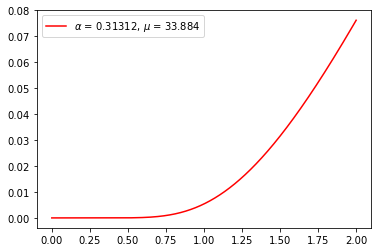

In [22]:
plt.plot(x_, inv_gaussian_distribution(x_), label=fr"$\alpha$ = {alpha:.5}, $\mu$ = {estimated_E:.5}", color='red')
plt.legend()
plt.show()

In [23]:
inv_gaussian_distribution_density = get_inv_gaussian_distribution_density(alpha, estimated_E)

C:\Users\ZHAMOI~1\AppData\Local\Temp/ipykernel_4184/1519827272.py:6: RuntimeWarning: divide by zero encountered in true_divide
  -(x/mu - 2 + mu/x) * a / 2
C:\Users\ZHAMOI~1\AppData\Local\Temp/ipykernel_4184/1519827272.py:8: RuntimeWarning: invalid value encountered in true_divide
  return first_exp * np.sqrt(mu * a) / np.sqrt(2 * np.pi * x**3)


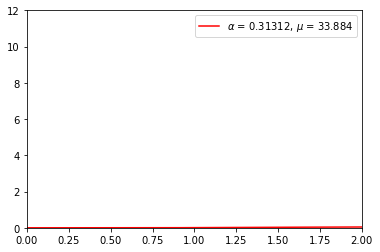

In [28]:
plt.plot(x_, inv_gaussian_distribution_density(x_), label=fr"$\alpha$ = {alpha:.5}, $\mu$ = {estimated_E:.5}", color='red')
plt.xlim((0, 2))
plt.ylim((0, 12))
plt.legend()
plt.show()

## Different $\alpha$ variations with fixed $\mu=1$

C:\Users\ZHAMOI~1\AppData\Local\Temp/ipykernel_4184/1519827272.py:6: RuntimeWarning: divide by zero encountered in true_divide
  -(x/mu - 2 + mu/x) * a / 2
C:\Users\ZHAMOI~1\AppData\Local\Temp/ipykernel_4184/1519827272.py:8: RuntimeWarning: invalid value encountered in true_divide
  return first_exp * np.sqrt(mu * a) / np.sqrt(2 * np.pi * x**3)
C:\Users\ZHAMOI~1\AppData\Local\Temp/ipykernel_4184/1519827272.py:6: RuntimeWarning: divide by zero encountered in true_divide
  -(x/mu - 2 + mu/x) * a / 2
C:\Users\ZHAMOI~1\AppData\Local\Temp/ipykernel_4184/1519827272.py:8: RuntimeWarning: invalid value encountered in true_divide
  return first_exp * np.sqrt(mu * a) / np.sqrt(2 * np.pi * x**3)


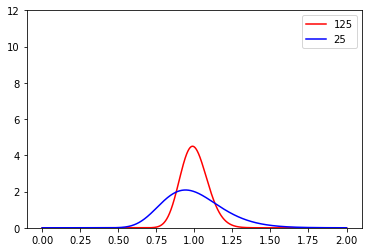

In [27]:
plt.plot(x_, get_inv_gaussian_distribution_density(125, 1)(x_), label="125", color='red')
plt.plot(x_, get_inv_gaussian_distribution_density(25, 1)(x_), label="25", color='blue')

plt.legend()
plt.ylim((0, 12))
plt.show()